In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
model = Sequential([
	Flatten(input_shape=(28, 28)),
	Dense(512, activation='relu'),
	Dropout(0.2),
	Dense(512, activation='relu'),
	Dropout(0.2),
	Dense(10, activation='softmax')
])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8583 - loss: 3.5485 - val_accuracy: 0.9406 - val_loss: 0.4324
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9179 - loss: 0.5236 - val_accuracy: 0.9487 - val_loss: 0.2210
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9377 - loss: 0.2808 - val_accuracy: 0.9573 - val_loss: 0.1606
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9480 - loss: 0.2021 - val_accuracy: 0.9631 - val_loss: 0.1406
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9560 - loss: 0.1662 - val_accuracy: 0.9630 - val_loss: 0.1352
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9592 - loss: 0.1543 - val_accuracy: 0.9640 - val_loss: 0.1399
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9599 - loss: 0.1507 - val_accuracy: 0.9656 - val_loss: 0.1405
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9617 - loss: 0.1431 - val_accuracy: 0.

In [7]:
test_loss, test_acc= model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9649 - loss: 0.1427


In [8]:
print(f"Loss : {test_loss} \nAccuracy : {test_acc}")

Loss : 0.14266465604305267 
Accuracy : 0.964900016784668


In [9]:
pred = model.predict(X_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [10]:
pred.shape

(10000, 10)

In [ ]:
first_five_pred = np.argmax(pred, axis = 1)[:5] # from 10 prob return highest prob index
pred = np.argmax(pred, axis=1)
label = y_test[:5] 

In [ ]:
print(first_five_pred)
print(label)	

[7 2 1 0 4]
[7 2 1 0 4]


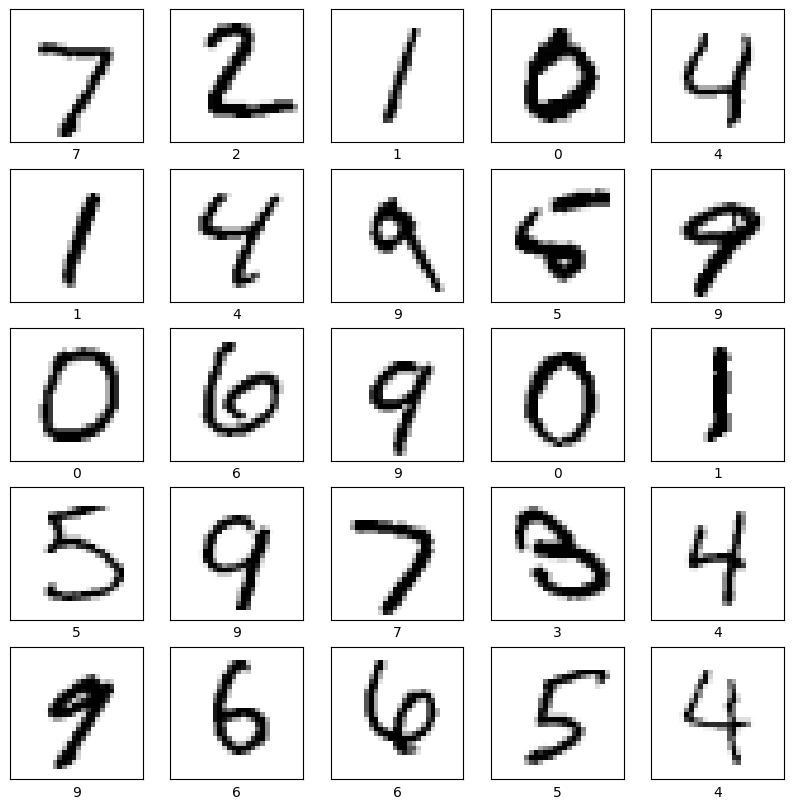

In [13]:
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(25):
	plt.subplot(5, 5, i+1)
	plt.imshow(X_test[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[pred[i]])
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)